# Postwork 4

En este Postwork vamos a hacer análisis bivariado de nuestras variables numéricas. Si tu dataset sólo tiene variables categóricas o datos no estructurados (texto libre), entonces puedes pedirle a tu experta que te comparta algún dataset con el que puedas realizar estos ejercicios.
Utilizando tu dataset, realiza las siguientes actividades:

- Identifica cuáles son las variables numéricas en tu dataset.
- Asegúrate de que tengan el tipo de dato correcto y que no haya NaNs por ahí escondidos.
- Genera una matriz de correlaciones y un pairplot para visualizar de manera general las relaciones entre tus variables numéricas.
- Utilizando gráficas de dispersión y tus medidas de locación y dispersión, identifica dónde hay valores atípicos y decide qué hacer con ellos.
- Revisa si tu revisión de valores atípicos cambió de alguna manera las relaciones existentes.
- Donde consideres necesario, entrena modelos de Regresión Lineal con un o más pares de variables. Incluso si no te parece que realizar predicciones entre pares de variables tiene sentido para tu proyecto, prueba realizar un par de regresiones para que practiques el procedimiento.


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


In [2]:
data = pd.read_csv('datos_credito.csv')

data.head()

,Unnamed: 0,Default,Proporción de uso de tarjetas,Edad,Número de préstamos retrasados,Proporción de deuda vs ingresos,Monto de ingreso mensual,Número de préstamos y TDC,Número de retrasos (60 días),Número de créditos hipotecarios,Retrasos de más de 30 días,Número de dependientes,Límite de crédito
0,0,1,0.77,45,2,0.80,9120.0,13,0,6,0,2.0,3192.0
1,1,0,0.96,40,0,0.12,2600.0,4,0,0,0,1.0,910.0
2,2,0,0.66,38,1,0.09,3042.0,2,1,0,0,0.0,1064.7
3,3,0,0.23,30,0,0.04,3300.0,5,0,0,0,0.0,1155.0
4,4,0,0.91,49,1,0.02,63588.0,7,0,1,0,0.0,22255.8


Antes de realizar el análisis de correlación entre las variables, notamos que tenemos la columna `Unnamed: 0`, la cual funciona como un índice, pero es redundante al tener adicionalmente el index de la dataframe. Por lo tanto, la retiramos para esta parte.

In [3]:
data = data.drop(['Unnamed: 0'], axis = 1)

data.head()

,Default,Proporción de uso de tarjetas,Edad,Número de préstamos retrasados,Proporción de deuda vs ingresos,Monto de ingreso mensual,Número de préstamos y TDC,Número de retrasos (60 días),Número de créditos hipotecarios,Retrasos de más de 30 días,Número de dependientes,Límite de crédito
0,1,0.77,45,2,0.80,9120.0,13,0,6,0,2.0,3192.0
1,0,0.96,40,0,0.12,2600.0,4,0,0,0,1.0,910.0
2,0,0.66,38,1,0.09,3042.0,2,1,0,0,0.0,1064.7
3,0,0.23,30,0,0.04,3300.0,5,0,0,0,0.0,1155.0
4,0,0.91,49,1,0.02,63588.0,7,0,1,0,0.0,22255.8


Ahora, revisamos que el dataset tiene el tipo de variables correctas.

In [4]:
data.dtypes

Default                              int64
Proporción de uso de tarjetas      float64
Edad                                 int64
Número de préstamos retrasados       int64
Proporción de deuda vs ingresos    float64
Monto de ingreso mensual           float64
Número de préstamos y TDC            int64
Número de retrasos (60 días)         int64
Número de créditos hipotecarios      int64
Retrasos de más de 30 días           int64
Número de dependientes             float64
Límite de crédito                  float64
dtype: object

Todas son variables numéricas, lo cual es correcto. Adicionalmente y por completitud, verificamos que no existan valores NaN o nulos que afecten nuestro análisis.

In [57]:
data.isnull().values.any()

False

También, nos damos cuenta de que tenemos una variable categórica `Default`, que como no es necesaria para este trabajo, también podemos quitarla.

In [6]:
data_filtrada = data.drop(columns = ['Default'])

data_filtrada.head()

,Proporción de uso de tarjetas,Edad,Número de préstamos retrasados,Proporción de deuda vs ingresos,Monto de ingreso mensual,Número de préstamos y TDC,Número de retrasos (60 días),Número de créditos hipotecarios,Retrasos de más de 30 días,Número de dependientes,Límite de crédito
0,0.77,45,2,0.80,9120.0,13,0,6,0,2.0,3192.0
1,0.96,40,0,0.12,2600.0,4,0,0,0,1.0,910.0
2,0.66,38,1,0.09,3042.0,2,1,0,0,0.0,1064.7
3,0.23,30,0,0.04,3300.0,5,0,0,0,0.0,1155.0
4,0.91,49,1,0.02,63588.0,7,0,1,0,0.0,22255.8


Podemos verificar el grado de correlación entre las variables del dataset utilizando el comando `df.corr()`.

In [7]:
data_filtrada.corr()

,Proporción de uso de tarjetas,Edad,Número de préstamos retrasados,Proporción de deuda vs ingresos,Monto de ingreso mensual,Número de préstamos y TDC,Número de retrasos (60 días),Número de créditos hipotecarios,Retrasos de más de 30 días,Número de dependientes,Límite de crédito
Proporción de uso de tarjetas,1.000000,-0.005476,-0.001194,-0.000243,0.007124,-0.010880,-0.000931,0.005895,-0.000955,0.002347,0.007124
Edad,-0.005476,1.000000,-0.049177,-0.001260,0.037717,0.187112,-0.047889,0.065110,-0.043501,-0.206397,0.037717
Número de préstamos retrasados,-0.001194,-0.049177,1.000000,-0.001981,-0.010217,-0.043868,0.975259,-0.024036,0.980131,0.003538,-0.010217
Proporción de deuda vs ingresos,-0.000243,-0.001260,-0.001981,1.000000,-0.028712,0.008685,-0.002703,0.019574,-0.001801,0.009803,-0.028712
Monto de ingreso mensual,0.007124,0.037717,-0.010217,-0.028712,1.000000,0.091455,-0.012743,0.124959,-0.011116,0.062647,1.000000
Número de préstamos y TDC,-0.010880,0.187112,-0.043868,0.008685,0.091455,1.000000,-0.072249,0.426536,-0.061505,0.038342,0.091455
Número de retrasos (60 días),-0.000931,-0.047889,0.975259,-0.002703,-0.012743,-0.072249,1.000000,-0.040573,0.989277,-0.003779,-0.012743
Número de créditos hipotecarios,0.005895,0.065110,-0.024036,0.019574,0.124959,0.426536,-0.040573,1.000000,-0.034118,0.118997,0.124959
Retrasos de más de 30 días,-0.000955,-0.043501,0.980131,-0.001801,-0.011116,-0.061505,0.989277,-0.034118,1.000000,-0.005092,-0.011116
Número de dependientes,0.002347,-0.206397,0.003538,0.009803,0.062647,0.038342,-0.003779,0.118997,-0.005092,1.000000,0.062647


A primera vista es un poco complicado identificar correlaciones importantes entre todas las variables del dataset. Así que nos apoyamos de un recurso visual, el `heatmap` para visualizar la dataframe de forma más fácil.

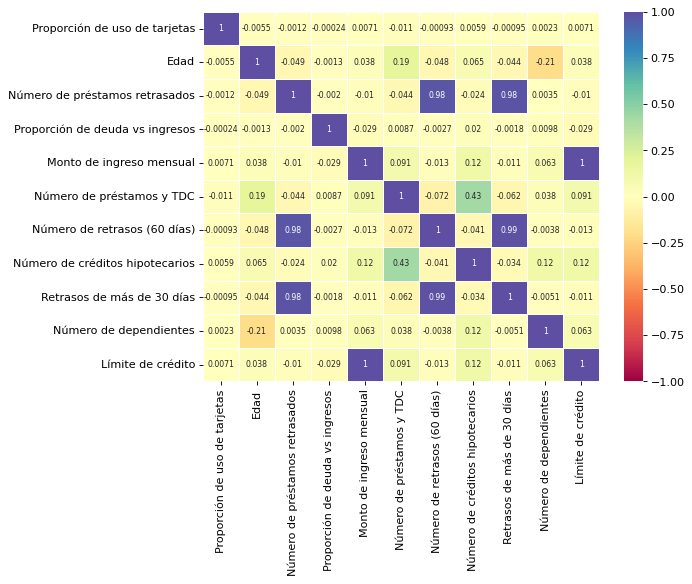

In [8]:
fig = plt.figure(figsize = (8,6), dpi = 80)

ax = sns.heatmap(data_filtrada.corr(), vmin = -1, vmax = 1, annot = True, cmap = "Spectral", lw = 0.5, annot_kws={"size": 7})

En el mapa de calor anterior, los valores van de -1 a 1, siendo los colores más cercanos al azul los que se aproximan al 1 y los más cercanos al rojo los que se aproximan al -1.

Como en todos los mapas de calor, la diagonal principal siempre está llena de 1's, debido a que expresa la correlación de una variable consigo misma. En general, la mayor cantidad de las variables del dataset tienen un grado de correlación muy pequeño, cercano a 0. Esto nos indica que no hay correlación entre ellas, y por lo tanto no podríamos generar un modelo de regresión que nos ayude a predecir nuevos valores a partir de una relación de las variables.

El resto del trabajo estará basado en lo que obtuvimos en este mapa de calor.

A continuación, obtendremos algunas medidas de tendencia central de cada una de las variables del dataset, esto con el fin de poder identificar valores atípicos al momento de generar las gráficas de dispersión.

In [9]:
data_filtrada.describe()

,Proporción de uso de tarjetas,Edad,Número de préstamos retrasados,Proporción de deuda vs ingresos,Monto de ingreso mensual,Número de préstamos y TDC,Número de retrasos (60 días),Número de créditos hipotecarios,Retrasos de más de 30 días,Número de dependientes,Límite de crédito
count,120269.000000,120269.000000,120269.000000,120269.000000,1.202690e+05,120269.000000,120269.000000,120269.000000,120269.000000,120269.000000,1.202690e+05
mean,5.899832,51.289792,0.381769,26.598722,6.670221e+03,8.758475,0.211925,1.054519,0.187829,0.851832,2.334577e+03
std,257.040686,14.426684,3.499234,424.446461,1.438467e+04,5.172835,3.465276,1.149273,3.447901,1.148391,5.034636e+03
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,0.040000,40.000000,0.000000,0.140000,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000,1.190000e+03
50%,0.180000,51.000000,0.000000,0.300000,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000,1.890000e+03
75%,0.580000,61.000000,0.000000,0.480000,8.249000e+03,11.000000,0.000000,2.000000,0.000000,2.000000,2.887150e+03
max,50708.000000,103.000000,98.000000,61106.500000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000,1.053062e+06


Tomando en consideración el mapa de calor, generamos una gráfica de dispersión entre la variable `Edad` y `Número de dependientes`, que tienen una correlación de `-0.21`.

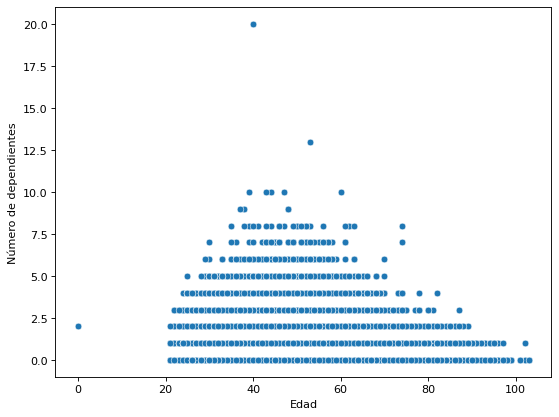

In [10]:
fig = plt.figure(figsize = (8,6), dpi = 80)

ax = sns.scatterplot(data_filtrada, x = 'Edad', y = 'Número de dependientes')

Notamos que tenemos valores atípicos, ya que hay un registro que tiene 20 dependientes, podemos filtrar al dataset para quitar ese dato.

In [58]:
filtro = data_filtrada[((data_filtrada['Número de dependientes'] < 12) & data_filtrada['Número de dependientes'] > 0) & ((data_filtrada['Edad'] > 0) & (data_filtrada['Edad']) < 90) ]

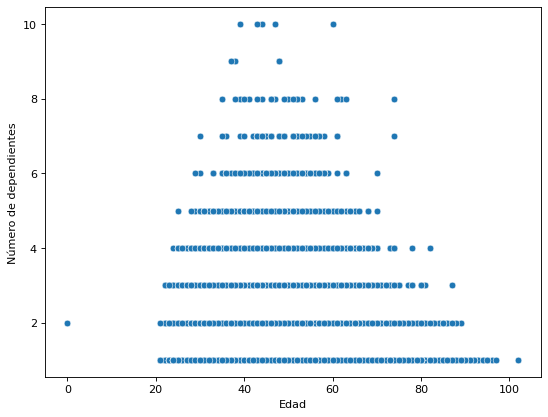

In [59]:
fig = plt.figure(figsize = (8,6), dpi = 80)

ax = sns.scatterplot(filtro, x = 'Edad', y = 'Número de dependientes')

Sólo para ejemplificar, ¿qué ocurre cuando las variables consideradas tienen un coeficiente de correlación muy bajo (muy cercano a 0)? Veamos, si pensamos en las variables `Número de préstamos retrasados` y `Proporción de uso de tarjetas`, la matriz de correlación y el mapa de calor indican que el grado de correlación entre éstas es de `-0.001194`. Gráficamente se ven así:	

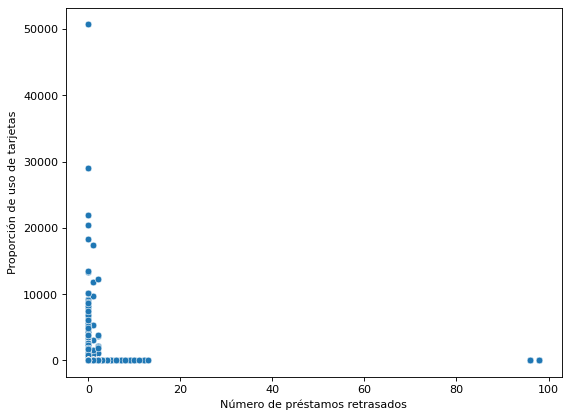

In [13]:
fig = plt.figure(figsize = (8,6), dpi = 80)

ax = sns.scatterplot(data_filtrada, x ='Número de préstamos retrasados', y ='Proporción de uso de tarjetas' )

Más aún, notamos que tenemos varios outliers, que tomando en cuenta la media de ambas, podemos quitar para obtener lo siguiente.

In [14]:
filtro_1 = data_filtrada[(data_filtrada['Número de préstamos retrasados'] < 20)  & (data_filtrada['Proporción de uso de tarjetas'] < 20000)]

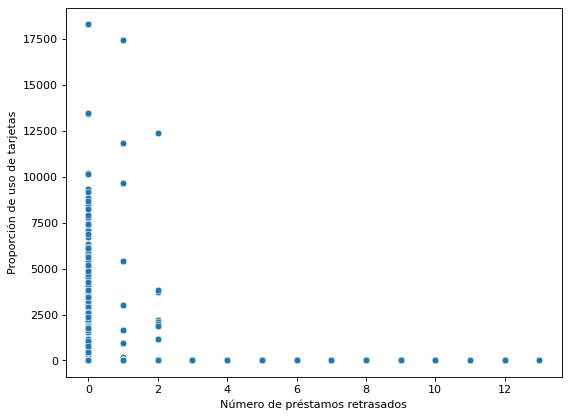

In [15]:
fig = plt.figure(figsize = (8,6), dpi = 80)

ax = sns.scatterplot(filtro_1, x ='Número de préstamos retrasados', y ='Proporción de uso de tarjetas')

Ahora que no tenemos la presencia de datos atípicos, podemos ver claramente que no se observa una tendencia lineal entre las variables, es decir, que no existe una relación que las asocie de manera lineal, por lo tanto su valor de correlación es muy cercano a 0. Una no depende de la otra en absoluto.

Ante esa situación, realmente no hay mucho que se pueda hacer. Así que continuaremos con otro conjunto de variables que tengan una correlación mayor, cercana a 1 o a -1.

Intentemos ahora con las variables `Edad` y `Número de préstamos y TDC`.

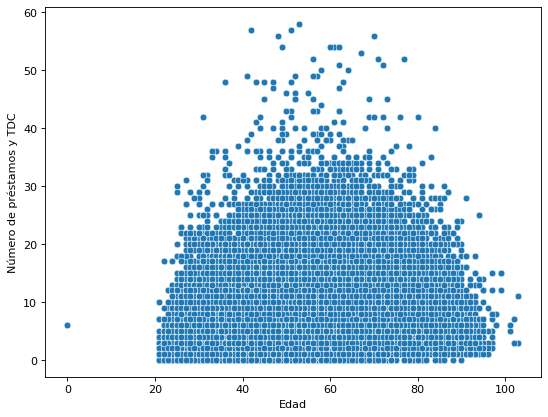

In [16]:
fig = plt.figure(figsize = (8,6), dpi = 80)

ax = sns.scatterplot(data_filtrada, x = 'Edad', y = 'Número de préstamos y TDC')

De acuerdo a la matriz de correlaciones, el valor de la correlación entre estas variables es del `0.187112`. 

Consideramos también las variables  `Monto de ingreso mensual` y `Número de créditos hipotecarios`.

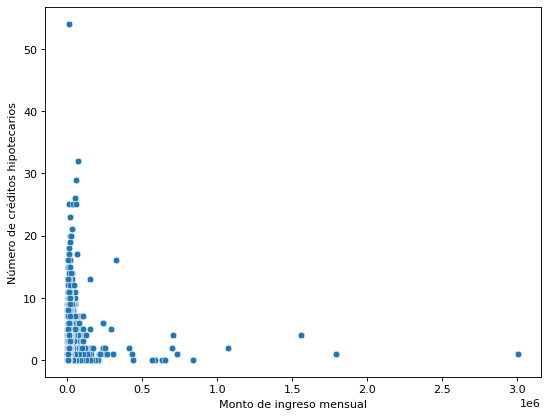

In [17]:
fig = plt.figure(figsize = (8,6), dpi = 80)

ax = sns.scatterplot(data_filtrada, x = 'Monto de ingreso mensual', y = 'Número de créditos hipotecarios')

Hay datos atípicos, debemos filtrarlos considerando los valores del promedio.

In [18]:
filtro_2 = data_filtrada[(data_filtrada['Monto de ingreso mensual'] < 1.0e6) & (data_filtrada['Número de créditos hipotecarios'] < 50)]

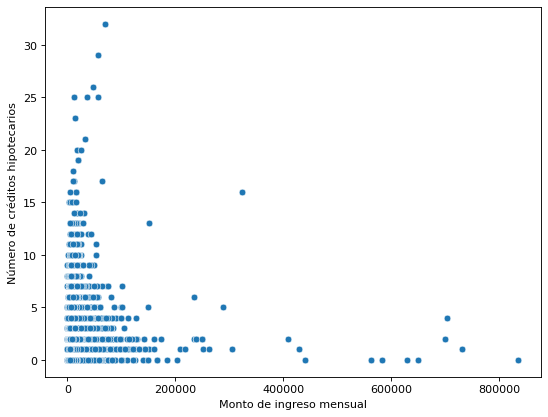

In [19]:
fig = plt.figure(figsize = (8,6), dpi = 80)

ax = sns.scatterplot(filtro_2, x = 'Monto de ingreso mensual', y = 'Número de créditos hipotecarios')

Estas variables tienen un grado de correlación de `0.124959`.

También, visuzalizamos la relación que existe entre las variables `Número de créditos hipotecarios` y `Número de préstamos y TDC`.

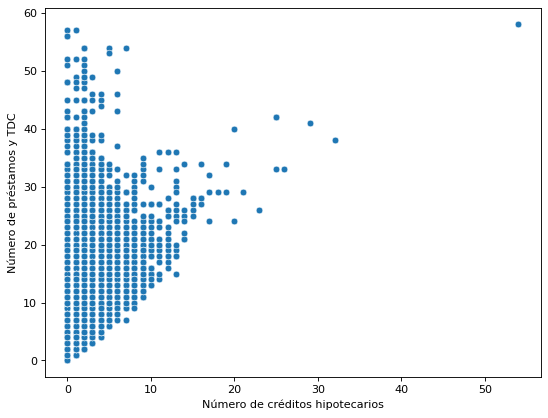

In [20]:
fig = plt.figure(figsize = (8,6), dpi = 80)

ax = sns.scatterplot(data_filtrada, x = 'Número de créditos hipotecarios', y = 'Número de préstamos y TDC')

Eliminando el valor atípico, nos queda la siguiente gráfica.

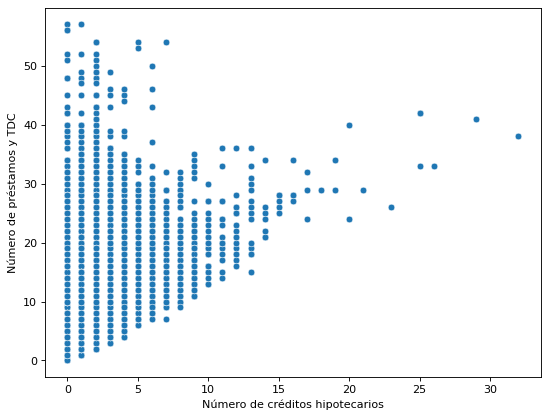

In [21]:
filtro_3 = data_filtrada[data_filtrada['Número de créditos hipotecarios'] < 40] 

fig = plt.figure(figsize = (8,6), dpi = 80)

ax = sns.scatterplot(filtro_3, x = 'Número de créditos hipotecarios', y = 'Número de préstamos y TDC')

Esta combinación de variables nos da una relación muy parecida a una correlación positiva. Esto coincide con el valor del coeficiente de correlación obtenido, de `0.426536`.

Finalmente, consideramos las variables `Número de préstamos retrasados` y `Número de retrasos (60 días)`. 

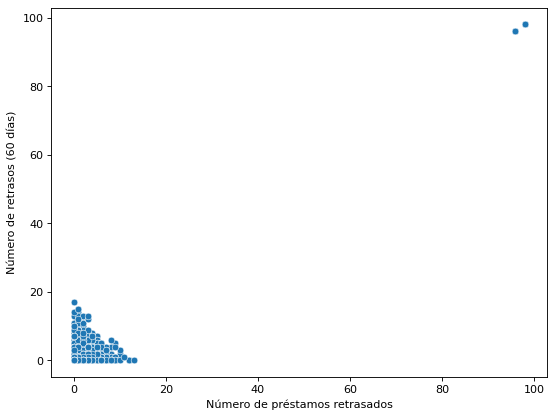

In [22]:
fig = plt.figure(figsize = (8,6), dpi = 80)

ax = sns.scatterplot(data_filtrada, x = 'Número de préstamos retrasados', y = 'Número de retrasos (60 días)')

Eliminando los valores atípicos, obtenemos lo siguiente.

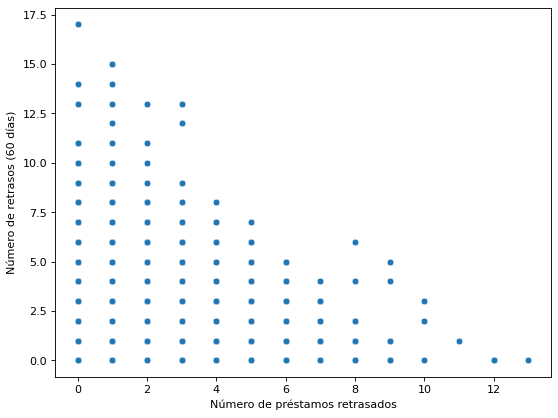

In [23]:
filtro_4 = data_filtrada[data_filtrada['Número de préstamos retrasados'] < 20]

fig = plt.figure(figsize = (8,6), dpi = 80)

ax = sns.scatterplot(filtro_4, x = 'Número de préstamos retrasados', y = 'Número de retrasos (60 días)')

Cabe mencionar que de acuerdo a la matriz de correlación, estas variables tienen el grado de correlación más alto, ya que es de `0.975259`.

Ahora, podemos efectuar un análisis de regresión, el cual se realizará en los pares de variables que poseen un mayor grado de correlación, ya que efectuarlo en aquellas con correlación cercana a 0 no tiene sentido, ya que no podemos ajustarla a una línea recta.

Para ello nos apoyaremos de `Scikit Learn` utilizando el módulo `LinearRegression`. De manera muy sencilla, lo que hace este algoritmo es una regresión lineal de mínimos cuadrados ordinaria. 

`LinearRegression` ajusta a un modelo lineal con coeficientes $w_i$ con $i = 1,2,...,n$ para minimizar el residuo de la suma de cuadrados entre la variable a predecir del dataset y los valores predichos por la aproximación lineal.

Entonces, el objetivo de la regresión lineal es encontrar una función que nos permita predecir una de las variables a partir de la otra. Geométricamente, se trata de encontrar la línea recta que mejor se aproxime a la mayor cantidad de datos puntuales en nuestras gráficas de dispersión. 

Para ello, primero debemos decidir quién es quién, es decir, cuál será la variable dependiente y cuál la independiente (o la variable que buscamos predecir). 

Comencemos con las variables `Edad`  y  `Número de préstamos y TDC`. Diremos que queremos predecir el número de préstamos y de tarjetas de crédito asociados a un cliente de acuerdo a la edad del mismo. Por lo que $x=$ `Edad` , $y = $ `Número de préstamos y TDC`.

Para entrenar el modelo, necesitamos llamar al método `LinearRegression` asociándolo a una variable. Después, utilizaremos el módulo `LinearRegression().fit()` que toma como argumentos la variable dependiente, como una data frame, y la variable independiente.

In [24]:
lr = LinearRegression()

lr.fit(data_filtrada['Edad'].to_frame(), data_filtrada['Número de préstamos y TDC'])

LinearRegression()

Después, debemos utilizar el método `LinearRegression().predict()` para predecir los valores que ajustó el modelo a partir de la variable independiente

In [25]:
y_pred = lr.predict(data_filtrada['Edad'].to_frame())

Y finalmente, podemos graficar el resultado obtenido, respecto a los datos que ya teniamos.

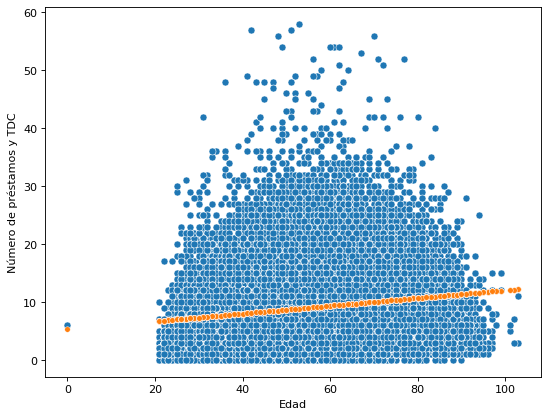

In [26]:
fig = plt.figure(figsize = (8,6), dpi = 80)
ax = sns.scatterplot(data_filtrada, x ='Edad', y ='Número de préstamos y TDC', s = 40)
ax = sns.scatterplot(x = data_filtrada['Edad'], y = y_pred, s = 25)

Notamos que la línea que genera los puntos del modelo de regresión no es suficiente mas que para indicar una tendencia creciente en los datos, sin embargo no es adecuada para el rango de todos los valores.

Aún así, podemos obtener la ecuación de la recta de regresión para este conjunto de datos en particular, recordando que la ecuación general de una recta está dada por:

$$ y = mx + b$$

donde $m$ es la pendiente y $b$ el intercepto con el eje $y$.

In [60]:
m1 = lr.coef_[0]
b1 = lr.intercept_

La ecuación de la recta es:

In [62]:
print(f'y = {round(m1,3)} * x + {round(b1,3)}')

y = 0.067 * x + 5.317


¿Cómo cuantificamos con un valor la efectividad de nuestro modelo? Podemos usar el coeficiente de determinación o $R^2$. Este coeficiente nos dice qué proporción de la variabilidad de `y` puede ser explicada usando la variable `y`. En el caso de la Regresión Linear Simple, R2 se puede obtener elevando al cuadrado el coeficiente de correlación de Pearson:

In [39]:
round(lr.score(data_filtrada['Edad'].to_frame(), data_filtrada['Número de préstamos y TDC']),3)

0.035

Podemos decir entonces que la variable `Edad` explica aproximadamente el 4% de la variabilidad de `Número de préstamos y TDC`. No hay más que decir, ya que así se comportan los datos.


Hagamos otro análisis de regresión pero ahora con las variables `Número de créditos hipotecarios` (variable dependiente) y `Número de préstamos y TDC` (variable independiente). El procedimiento es completamente análogo al análisis anterior.

In [40]:
lr_2 = LinearRegression()

In [41]:
lr_2.fit(filtro_3['Número de créditos hipotecarios'].to_frame(), filtro_3['Número de préstamos y TDC'])

LinearRegression()

In [42]:
y_pred2 = lr_2.predict(filtro_3['Número de créditos hipotecarios'].to_frame())

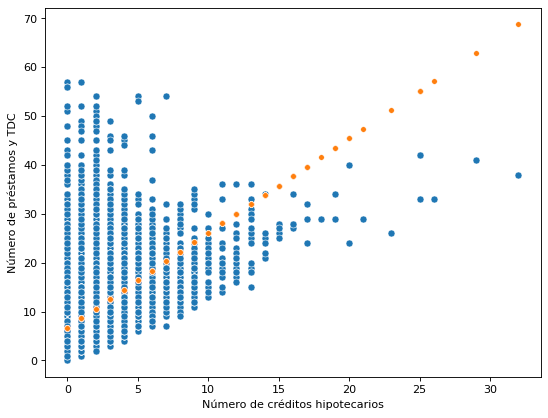

In [43]:
fig = plt.figure(figsize = (8,6), dpi = 80)
ax = sns.scatterplot(filtro_3, x ='Número de créditos hipotecarios', y ='Número de préstamos y TDC', s = 40)
ax = sns.scatterplot(x = filtro_3['Número de créditos hipotecarios'], y = y_pred2, s = 25)

En este caso, la línea recta muestra un buen ajuste para cierta cantidad de datos de un primer intervalo, de [0,15] para el número de créditos hipotecarios, sin embargo, para valores mayores de la variable independiente, el ajuste tiene un error considerable respecto a las predicciones y a los datos que se tienen. Veamos entonces cuál es la ecuación que define a la recta y el respectivo $R^2$ para este modelo en particular.

In [64]:
m2 = lr_2.coef_[0]
b2 = lr_2.intercept_

In [65]:
print(f'y = {round(m2,3)} * x + {round(b2,3)}')

y = 1.938 * x + 6.716


In [46]:
round(lr_2.score(filtro_3['Número de créditos hipotecarios'].to_frame(), filtro_3['Número de préstamos y TDC']),3)

0.182

Se explican el 18% de la variabilidad de `Número de préstamos y TDC` a partir de la variable `Número de créditos hipotecarios`. 

El último análisis de regresión se hará considerando a las variables $x=$ `Número de préstamos retrasados` y $y=$ `Número de retrasos (60 días)`. 

In [48]:
lr_3 = LinearRegression()

lr_3.fit(filtro_4['Número de préstamos retrasados'].to_frame(), filtro_4['Número de retrasos (60 días)'])

LinearRegression()

In [49]:
y_pred3 = lr_3.predict(filtro_4['Número de préstamos retrasados'].to_frame())

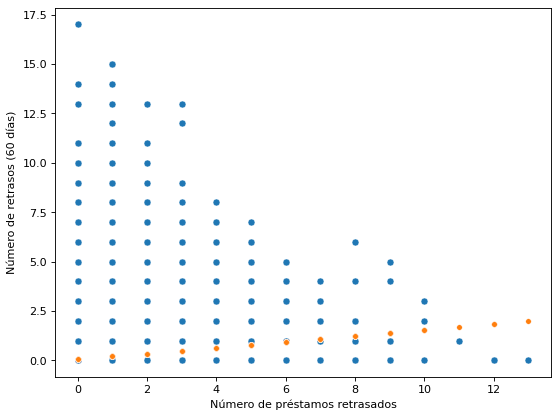

In [50]:
fig = plt.figure(figsize = (8,6), dpi = 80)
ax = sns.scatterplot(filtro_4, x ='Número de préstamos retrasados', y ='Número de retrasos (60 días)', s = 40)
ax = sns.scatterplot(x = filtro_4['Número de préstamos retrasados'], y = y_pred3, s = 25)

Nuevamente, el ajuste de regresión sólo puede predecir de forma muy limitada los valores del conjunto de datos considerado. La ecuación de la recta está dada por:

In [67]:
m3 = lr_3.coef_[0]
b3 = lr_3.intercept_

print(f'y = {round(m3,3)} * x + {round(b3,3)}')

y = 0.149 * x + 0.052


En cuanto al $R^2$, es bastante bajo ya que sólo explica la variabilidad de aproximadamente el 5% de los datos.

In [68]:
round(lr_3.score(filtro_4['Número de préstamos retrasados'].to_frame(), filtro_4['Número de retrasos (60 días)']),3)

0.048